### **Importing Required Libraries**
In this section, we import the necessary libraries and modules for performing the analysis, data manipulation, and visualization.

- `pandas`: Used for data manipulation and working with dataframes.
- `matplotlib.pyplot`: Used for creating visualizations such as graphs and plots.
- `seaborn`: Provides a high-level interface for creating attractive and informative statistical graphics (although not used in this specific section, it is useful for complex visualizations).
- `numpy`: Used for numerical operations, particularly for generating arrays and handling mathematical calculations.
- `cosine_similarity`: From `sklearn.metrics.pairwise`, this function calculates the cosine similarity between vectors, which is used to compare the statistical similarity between KDB and other players.

In [122]:
# Importing the necessary libraries for data manipulation, visualization, and similarity calculations.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [126]:

df = pd.read_html('/Users/sajidmahmood/Desktop/cam_data.xls')[0]
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = ['Rk', 'Player', '90s', 'Ast/90', 'xA/90', 'Cmp%', '1/3/90', 'KP/90', 
              'PassLive/90_1', 'PassLive/90_2', 'TB/90', 'PrgDist/90', '1/3/90_Carries', 
              'Season', 'Age', 'Nation', 'Team', 'Comp', 'MP', 'Min', '90s_Played', 
              'Starts', 'Subs', 'Pos', 'Unused_Column']

# List of the columns you want to keep
columns_of_interest = [
    'Player', '90s', 'Ast/90', 'xA/90', 'Cmp%', '1/3/90', 'KP/90',
    'PassLive/90_1', 'PassLive/90_2', 'TB/90', 'PrgDist/90',
    '1/3/90_Carries', 'Age', 'Nation', 'Team', 'Comp'
]

# Filter the DataFrame to only include the specified columns
df_filtered = df[columns_of_interest]

In [128]:
df_filtered.head()

,Player,90s,Ast/90,xA/90,Cmp%,1/3/90,KP/90,PassLive/90_1,PassLive/90_2,TB/90,PrgDist/90,1/3/90_Carries,Age,Nation,Team,Comp
0,James Ward-Prowse,37.5,0.1,0.1,78.9,4.7,2.0,0.1,1.7,0.1,53.8,0.7,27,eng ENG,Southampton,eng Premier League
1,Alex Iwobi,37.5,0.2,0.1,75.1,3.6,1.7,0.2,2.4,0.4,91.5,2.1,26,ng NGA,Everton,eng Premier League
2,Bruno Fernandes,36.8,0.2,0.3,73.8,4.0,3.2,0.4,4.5,0.9,88.8,1.8,27,pt POR,Manchester Utd,eng Premier League
3,JosÃ© Luis GarcÃ­a VayÃ¡,36.7,0.0,0.1,78.4,5.9,1.5,0.2,2.2,0.1,71.7,0.8,24,es ESP,Valencia,es La Liga
4,Declan Rice,36.4,0.0,0.1,86.5,6.4,1.0,0.2,2.4,0.1,135.2,2.1,23,eng ENG,West Ham,eng Premier League


In [130]:
# KDB's final key metrics in a dictionary
kdb_stats = {
    'KP/90': 3.12,
    'xA/90': 0.52,
    'Passes Final Third': 4.36,
    'TB/90': 0.60,
    'Ast/90': 0.40,
    'Pass Completion %': 76.5,
    'GCA/90': 0.56,
    'Carries into Final Third/90': 2.80,
    'Progressive Carrying Distance/90': 118.20,
    'SCA/90': 4.56
}

# Display the updated KDB's stats
print(kdb_stats)

{'KP/90': 3.12, 'xA/90': 0.52, 'Passes Final Third': 4.36, 'TB/90': 0.6, 'Ast/90': 0.4, 'Pass Completion %': 76.5, 'GCA/90': 0.56, 'Carries into Final Third/90': 2.8, 'Progressive Carrying Distance/90': 118.2, 'SCA/90': 4.56}


In [132]:
# Set the style of the plots for better aesthetics
sns.set(style="whitegrid")

/var/folders/kr/fjjlfxls59qgq27d9vr4vh9h0000gn/T/ipykernel_10723/1648138915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value", y="Metric", data=kdb_df, palette="viridis")


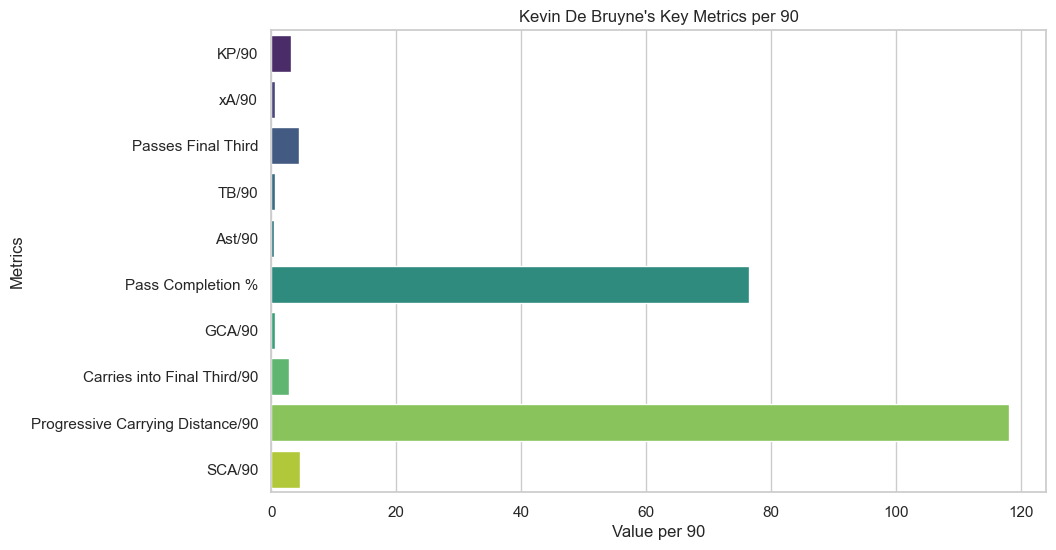

In [134]:
kdb_df = pd.DataFrame(list(kdb_stats.items()), columns=["Metric", "Value"])

# Plot KDB's stats
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Metric", data=kdb_df, palette="viridis")
plt.title('Kevin De Bruyne\'s Key Metrics per 90')
plt.xlabel('Value per 90')
plt.ylabel('Metrics')
plt.show()

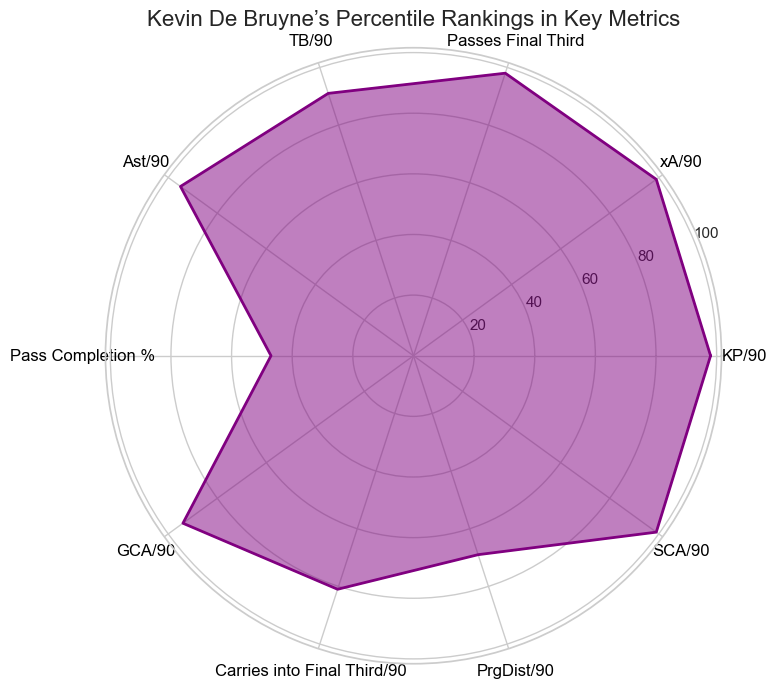

<Figure size 640x480 with 0 Axes>

In [136]:
# KDB's percentile data
metrics = ['KP/90', 'xA/90', 'Passes Final Third', 'TB/90', 'Ast/90', 'Pass Completion %', 'GCA/90', 
           'Carries into Final Third/90', 'PrgDist/90', 'SCA/90']
percentiles = [98, 99, 98, 91, 95, 47, 94, 81, 69, 99]  # Percentiles for each metric

# Create a pizza pie chart to show percentiles
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
percentiles += percentiles[:1]  # To close the circle
angles += angles[:1]  # To close the circle

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)
plt.fill(angles, percentiles, color='purple', alpha=0.5)
plt.plot(angles, percentiles, color='purple', linewidth=2)

# Add labels
plt.xticks(angles[:-1], metrics, color='black', size=12)
plt.title('Kevin De Bruyne’s Percentile Rankings in Key Metrics', size=16)
plt.show()
plt.savefig("my_plot.png")

In [138]:
# Convert KDB stats into a numpy array
kdb_vector = np.array(list(kdb_stats.values())).reshape(1, -1)

In [140]:
# Rename the columns in df_filtered to match the KDB column names
df_filtered = df_filtered.rename(columns={
    'Ast/90': 'Ast/90',
    'xA/90': 'xA/90',
    'Cmp%': 'Pass Completion %',
    '1/3/90': 'Passes Final Third',
    'KP/90': 'KP/90',
    'PassLive/90_1': 'GCA/90',  # Keeping as is, will be merged later if necessary
    'PassLive/90_2': 'SCA/90',  # Keeping as is, will be merged later if necessary
    'TB/90': 'TB/90',
    'PrgDist/90': 'PrgDist/90',
    '1/3/90_Carries': 'Carries into Final Third/90',
    'Age': 'Age',
    'Nation': 'Nation',
    'Team': 'Team',
    'Comp': 'Comp'
})

df_filtered.head()

,Player,90s,Ast/90,xA/90,Pass Completion %,Passes Final Third,KP/90,GCA/90,SCA/90,TB/90,PrgDist/90,Carries into Final Third/90,Age,Nation,Team,Comp
0,James Ward-Prowse,37.5,0.1,0.1,78.9,4.7,2.0,0.1,1.7,0.1,53.8,0.7,27,eng ENG,Southampton,eng Premier League
1,Alex Iwobi,37.5,0.2,0.1,75.1,3.6,1.7,0.2,2.4,0.4,91.5,2.1,26,ng NGA,Everton,eng Premier League
2,Bruno Fernandes,36.8,0.2,0.3,73.8,4.0,3.2,0.4,4.5,0.9,88.8,1.8,27,pt POR,Manchester Utd,eng Premier League
3,JosÃ© Luis GarcÃ­a VayÃ¡,36.7,0.0,0.1,78.4,5.9,1.5,0.2,2.2,0.1,71.7,0.8,24,es ESP,Valencia,es La Liga
4,Declan Rice,36.4,0.0,0.1,86.5,6.4,1.0,0.2,2.4,0.1,135.2,2.1,23,eng ENG,West Ham,eng Premier League


In [142]:
# Now that we have renamed, let's select only the relevant columns for comparison with KDB
df_for_comparison = df_filtered[['KP/90', 'xA/90', 'Passes Final Third', 'TB/90', 'Ast/90', 
                                 'Pass Completion %', 'GCA/90', 'Carries into Final Third/90', 
                                 'PrgDist/90', 'SCA/90']]

In [144]:
df_for_comparison

,KP/90,xA/90,Passes Final Third,TB/90,Ast/90,Pass Completion %,GCA/90,Carries into Final Third/90,PrgDist/90,SCA/90
0,2.0,0.1,4.7,0.1,0.1,78.9,0.1,0.7,53.8,1.7
1,1.7,0.1,3.6,0.4,0.2,75.1,0.2,2.1,91.5,2.4
2,3.2,0.3,4.0,0.9,0.2,73.8,0.4,1.8,88.8,4.5
3,1.5,0.1,5.9,0.1,0.0,78.4,0.2,0.8,71.7,2.2
4,1.0,0.1,6.4,0.1,0.0,86.5,0.2,2.1,135.2,2.4
...,...,...,...,...,...,...,...,...,...,...
100,1.1,0.1,4.8,0.2,0.1,88.4,0.2,1.5,85.3,2.2
101,1.0,0.1,2.4,0.1,0.1,73.5,0.1,0.6,59.7,2.0
102,1.3,0.2,6.5,0.4,0.1,81.2,0.2,2.8,141.7,2.6
103,1.9,0.2,1.5,0.4,0.3,73.9,0.3,2.4,106.0,2.5


In [146]:
# Calculate Cosine Similarity between KDB and each player
cosine_sim = cosine_similarity(kdb_vector, df_for_comparison)

In [148]:
# Create a DataFrame to hold Player names and their similarity scores
similarity_df = pd.DataFrame({
    'Player': df_filtered['Player'],
    'Cosine Similarity': cosine_sim[0]
})

In [150]:
# Sort players by Cosine Similarity in descending order and select the top 3 players
top_3_players = similarity_df.sort_values(by='Cosine Similarity', ascending=False).head(3)

In [152]:
# Display the top 3 players and their similarity scores
print(top_3_players)

               Player  Cosine Similarity
32   Maxence Caqueret           0.999728
73       Ludovic Blas           0.999688
75  Tijjani Reijnders           0.999663


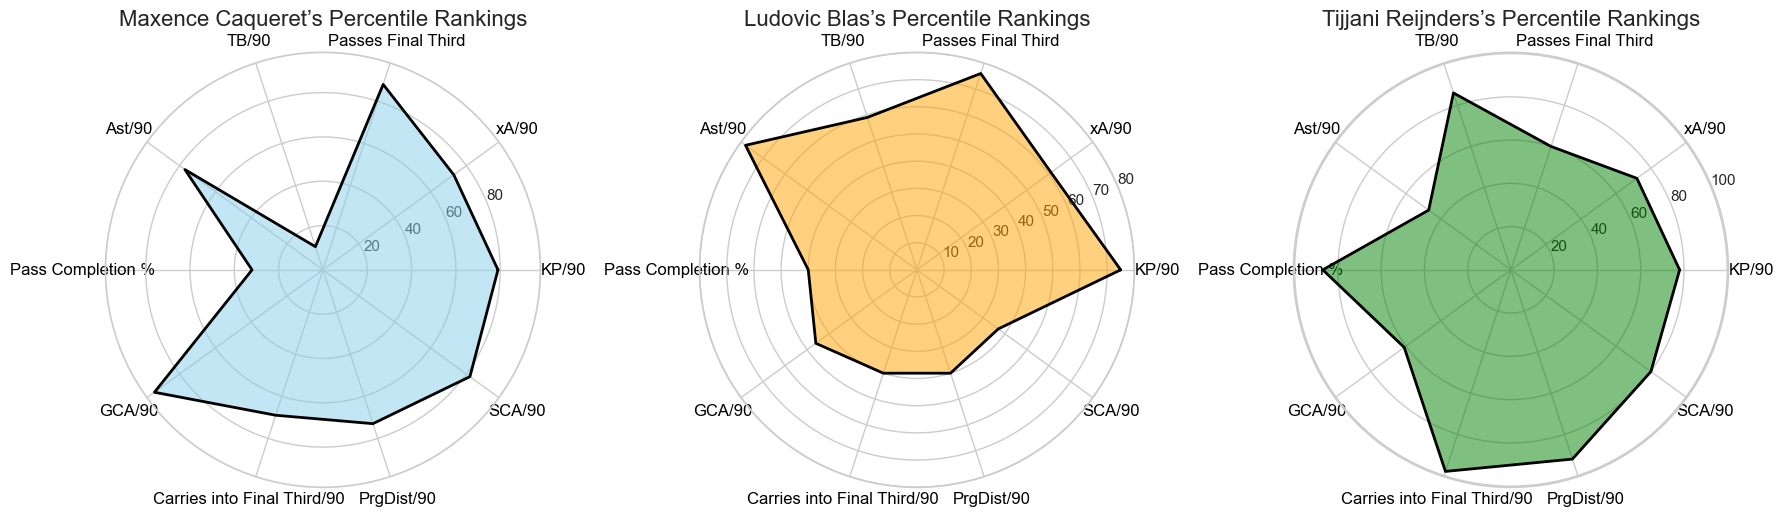

In [154]:
# Data for the top 3 players
metrics = ['KP/90', 'xA/90', 'Passes Final Third', 'TB/90', 'Ast/90', 'Pass Completion %', 'GCA/90', 
           'Carries into Final Third/90', 'PrgDist/90', 'SCA/90']

# Percentiles for each player
maxence_percentiles = [79, 73, 88, 11, 77, 32, 94, 69, 73, 82]
ludovic_percentiles = [75, 61, 76, 59, 78, 40, 46, 40, 40, 37]
tijjani_percentiles = [78, 72, 60, 86, 47, 87, 61, 98, 92, 80]

# Creating the angles for the pizza plot
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()

# Adding the first point to the end of the data so the chart is a complete circle
maxence_percentiles += maxence_percentiles[:1]
ludovic_percentiles += ludovic_percentiles[:1]
tijjani_percentiles += tijjani_percentiles[:1]
angles += angles[:1]

# Create a figure with 3 subplots (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 8), subplot_kw=dict(polar=True))

# Plot Maxence Caqueret
axes[0].fill(angles, maxence_percentiles, color='skyblue', alpha=0.5)
axes[0].plot(angles, maxence_percentiles, color='black', linewidth=2)
axes[0].set_xticks(angles[:-1])
axes[0].set_xticklabels(metrics, color='black', size=12, rotation=45)
axes[0].set_title("Maxence Caqueret’s Percentile Rankings", size=16)

# Plot Ludovic Blas
axes[1].fill(angles, ludovic_percentiles, color='orange', alpha=0.5)
axes[1].plot(angles, ludovic_percentiles, color='black', linewidth=2)
axes[1].set_xticks(angles[:-1])
axes[1].set_xticklabels(metrics, color='black', size=12, rotation=45)
axes[1].set_title("Ludovic Blas’s Percentile Rankings", size=16)

# Plot Tijjani Reijnders
axes[2].fill(angles, tijjani_percentiles, color='green', alpha=0.5)
axes[2].plot(angles, tijjani_percentiles, color='black', linewidth=2)
axes[2].set_xticks(angles[:-1])
axes[2].set_xticklabels(metrics, color='black', size=12, rotation=45)
axes[2].set_title("Tijjani Reijnders’s Percentile Rankings", size=16)

# Adjust layout to make sure the titles and labels don't overlap
plt.tight_layout()

# Show the plot
plt.show()